In [288]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Import Datasets

## Complement alimentaires

In [289]:
path = './data/'
filename = 'liste-des-complements-alimentaires-declares.csv'
df_complements = pd.read_csv(path + filename, sep =';')


# simplify the dataset
# cols_to_drop = ['Marque', 'ResponsableEtiquetage', 'Gamme', 'Aromes', 'parties_plantes', 'familles_plantes'] #'ModeEmploi'
# df_complements.drop(cols_to_drop, axis=1, inplace=True)


# drop duplicates
df_complements.drop_duplicates(inplace=True)


# visualize
df_complements.head()

,NomCommercial,Marque,FormeGalenique,ResponsableEtiquetage,DoseJournaliere,ModeEmploi,MisesEnGarde,Gamme,Aromes,population_a_risques,plantes,familles_plantes,parties_plantes,autres_ingredients,objectif_effet
0,CENTELLA extrait 4/1,SYNERVITAL,Gélule,IMPORT EXPORT DISTRI BUSINESS SYSTEM,4 gélules,avec un grand verre d'eau,NaN,NaN,NaN,NaN,Centella asiatica (L.) Urb.,Apiaceae,Feuille,maltodextrine,NaN
1,gingko biloba,labkaps,Gélule,LABKAPS,2 à 3 gélules/jour,NaN,NaN,NaN,NaN,"Allaitement,Enfants (moins de 12 ans),Grossess...",Ginkgo biloba L.,Ginkgoaceae,Feuille,Hydroxypropyl Méthyl Cellulose,"Concentration,Humeur,Mémoire"
2,Grand ortie,NaN,Compte-gouttes,COFFINET MICHAEL,18 gouttes,NaN,NaN,NaN,NaN,"Allaitement,Enfants en bas âge (1 à 3 ans),Gro...",Urtica dioica L.,Urticaceae,Feuille,"E422,Eau potable","Détoxifiant / Draineur,Humeur,Système urinaire"
3,Psyllium noir semence,L'Herbier de Gascogne / Le Comptoir de l'Apoth...,Sachet,L HERBIER DE GASCOGNE,1 à 3 cuillères à café par jour,Prendre une cuillère à café (env. 5 grammes) a...,Ne pas dépasser la dose journalière recommandé...,NaN,NaN,Autre (à préciser),Plantago afra L.,Plantaginaceae,Graine,NaN,Transit
4,Chrysanthellum,NaN,Gélule,ORONALYS SARL,3 gélules par jour,NaN,Ce complément alimentaire doit être utilisé da...,ORO-DIGEST,NaN,"Allaitement,Enfants (moins de 12 ans),Grossesse",Chrysanthellum americanum (L.) Vatke,Compositae,Parties aériennes,"E414,Hydroxypropyl Méthyl Cellulose",NaN


In [349]:
df_complements['objectif_effet'].value_counts().head(20)

objectif_effet
Autre (à préciser)                     4850
Sport                                  4245
Immunité                               2825
Digestion                              2184
Articulations                          2069
Sommeil                                1843
Détoxifiant / Draineur                 1648
Peau                                   1615
Circulation sanguine et lymphatique    1417
Cheveux et ongles                      1116
Voies respiratoires                     989
Système urinaire                        984
Antioxydant                             901
Humeur                                  842
Système nerveux                         828
Tonus sexuel                            828
Minceur / Brûleur                       789
Autre (à préciser),Immunité             736
Artères et cholestérol                  633
Transit                                 523
Name: count, dtype: int64

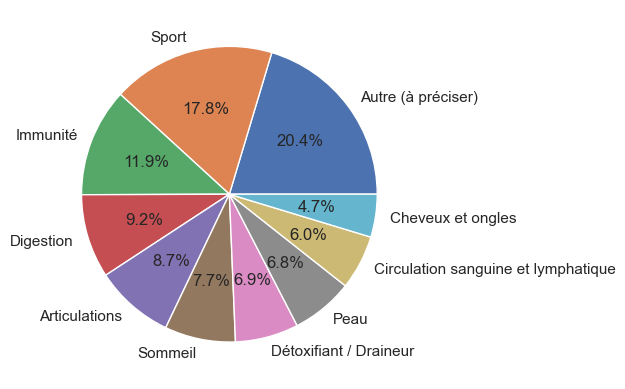

In [292]:
num_parts = 10

data = df_complements['objectif_effet'].value_counts().head(num_parts).values
labels = df_complements['objectif_effet'].value_counts().head(num_parts).index

plt.pie(data, labels = labels, autopct='%.1f%%')
plt.show()

## ingredients
* It contains the "substances"

In [293]:
path = './data/'
filename = 'ingredients.csv'

df_ingredients = pd.read_csv(path + filename, header=0)
df_ingredients.head()

,name,ingredient_type,url,novel_food,synonyms,substances
0,E160e,Additif,NaN,False,ß-apocarotenal-8' (C30),NaN
1,E161b,Additif,NaN,False,"caroténoïdes mélangés, lutéine, xanthophylles",NaN
2,E162,Additif,NaN,False,"bétanine, rouge de betterave",NaN
3,E163,Additif,NaN,False,anthocyanes,anthocyanes
4,E170,Additif,NaN,False,"carbonate de calcium, craie",NaN


In [294]:
# df_ingredients.info()
df_ingredients.loc[0,'substances']

nan

In [295]:
# df_ingredients[df_ingredients['name'] == 'Hydroxypropyl Méthyl Cellulose']
# df_ingredients[df_ingredients['name'] == 'E422']

# df_ingredients['name'].value_counts()

## plantes
* Each plant is associated to a "substance"

In [296]:
path = './data/'
filename = 'plantes.csv'

df_plantes = pd.read_csv(path + filename, header=0)
df_plantes.head()

,name,plant_family,synonyms,substances,url,novel_food
0,Abelmoschus esculentus (L.) Moench,Malvaceae,NaN,NaN,NaN,False
1,Abelmoschus moschatus Medik.,Malvaceae,NaN,NaN,NaN,False
2,Abies alba Mill.,Pinaceae,"Sapin argenté, Sapin blanc, Sapin pectiné",dérivés terpéniques,NaN,False
3,Abies balsamea (L.) Mill.,Pinaceae,Sapin baumier,dérivés terpéniques,NaN,False
4,Abies fraseri (Pursh) Poir.,Pinaceae,NaN,NaN,NaN,False


In [297]:
df_plantes[df_plantes['name']=='maltodextrine']['substances'].values

array([], dtype=object)

## substances
* moelcules
* vitamines
* minerals
* others, ex: coquilles de Saint-Jacques

In [298]:
path = './data/'
filename = 'substances.csv'

df_substances = pd.read_csv(path + filename, header=0)

df_substances.head(10)

,name,cas_number,einec_number,public_comments,url,novel_food,unit,must_specify_quantity,nutritional_reference,synonyms
0,polyphénols,NaN,NaN,NaN,NaN,false,mg,false,NaN,NaN
1,harmane,NaN,NaN,NaN,NaN,false,mg,false,NaN,NaN
2,monacoline K,NaN,NaN,Règlement (UE) 2022/860 modifiant le règlement...,NaN,false,mg,true,NaN,NaN
3,octopamine,NaN,NaN,NaN,NaN,false,mg,false,NaN,NaN
4,lactones terpéniques,NaN,NaN,NaN,NaN,false,mg,false,NaN,NaN
5,acide gamma-linolénique,NaN,NaN,NaN,NaN,false,mg,false,NaN,NaN
6,vinpocétine,NaN,NaN,NaN,NaN,false,mg,false,NaN,NaN
7,pyrogallol,87-66-1,2017629,NaN,NaN,false,mg,false,NaN,NaN
8,lithospermoside,NaN,NaN,NaN,NaN,false,mg,false,NaN,NaN
9,chromones,NaN,NaN,NaN,NaN,false,mg,false,NaN,NaN


In [299]:
df_substances['must_specify_quantity'].value_counts()

must_specify_quantity
false    723
true      79
g          1
Name: count, dtype: int64

In [300]:
df_substances[df_substances['name'].str.contains(',')]#['public_comments'].values

,name,cas_number,einec_number,public_comments,url,novel_food,unit,must_specify_quantity,nutritional_reference,synonyms
74,"viscotoxines (I, II, III)",NaN,NaN,NaN,NaN,false,mg,false,NaN,NaN
249,"pelletiérines (pelletiérine, iso, pseudo, méthyl)",NaN,NaN,NaN,NaN,false,mg,false,NaN,NaN
367,"kinkéloïdes (A, B, C, D)",NaN,NaN,NaN,NaN,false,mg,false,NaN,NaN
421,"cinéole 1,8",470-82-6,207-431,NaN,NaN,false,mg,false,NaN,eucalyptol
768,"lepidilines (A, B et C)",NaN,NaN,NaN,NaN,false,mg,false,NaN,NaN


In [301]:
## replace ',' by ';' to avoid issues when assembling all substances

def replace_coma_by_dot(row):    
    return str(row['name']).replace(',', '\.')

df_substances['name'] = df_substances.apply(replace_coma_by_dot, axis=1) 

In [302]:
df_substances[df_substances['name'].str.contains('\.')]#['public_comments'].values

,name,cas_number,einec_number,public_comments,url,novel_food,unit,must_specify_quantity,nutritional_reference,synonyms
74,viscotoxines (I\. II\. III),NaN,NaN,NaN,NaN,false,mg,false,NaN,NaN
249,pelletiérines (pelletiérine\. iso\. pseudo\. m...,NaN,NaN,NaN,NaN,false,mg,false,NaN,NaN
367,kinkéloïdes (A\. B\. C\. D),NaN,NaN,NaN,NaN,false,mg,false,NaN,NaN
421,cinéole 1\.8,470-82-6,207-431,NaN,NaN,false,mg,false,NaN,eucalyptol
768,lepidilines (A\. B et C),NaN,NaN,NaN,NaN,false,mg,false,NaN,NaN


## Import recommended quantities
* values available for certain **substances** only
* values are average values of RNP (Référence Nutritionnelle pour la population) or AS (Apport satisfaisant)

In [303]:
path = './data/'
filename = 'Tables exploitables - RNP_AS.csv'

df_ref_nutritionelles = pd.read_csv(path+filename)
df_ref_nutritionelles

,Vitamine/Minéral,Homme adulte,Femme adulte,Femme Enceinte,Femme Allaitante
0,Vitamine C,110 mg,110 mg,120 mg,170 mg
1,Vitamine A,750 µg,650 µg,700 µg,1300 µg
2,Calcium,950 mg,950 mg,950 mg,950 mg
3,Fer,11 mg,11 à 16 mg,16 mg,16 mg
4,Vitamine D,15 µg,15 µg,15 µg,15 µg
5,Vitamine B9,330 µg,330 µg,600 µg,500 µg
6,Vitamine B12,4 µg,4 µg,"4,5 µg",5 µg
7,Magnésium,380 mg,300 mg,300 mg,300 mg
8,Sélénium,70 µg,70 µg,70 µg,85 µg
9,Potassium,3500 mg,3500 mg,3500 mg,4000 mg


## Assemble the "substances" of each "complement alimentaire"

In [304]:
# Lookup dictionaries for plant:substances and ingredient:substances
plant_substances = df_plantes.set_index('name')['substances'].to_dict()
ingredient_substances = df_ingredients.set_index('name')['substances'].to_dict()


def compute_substances(row):

    # Get list of plants
    ls_plants = [item.strip() for item in str(row['plantes']).split(',') if item.strip() and item != 'nan']
    
    # Get list of ingredients
    ls_ingredients = [item.strip() for item in str(row['autres_ingredients']).split(',') if item.strip() and item != 'nan']
    
    # Get all substances from plants and ingredients
    ls_substances = []
    for plant in ls_plants:
        if plant in plant_substances:
            ls_substances.extend(str(plant_substances[plant]).split(','))
    
    for ingredient in ls_ingredients:
        if ingredient in ingredient_substances:
            ls_substances.extend(str(ingredient_substances[ingredient]).split(','))
    
    # Clean and return joined string
    ls_substances = [item.strip() for item in ls_substances if item and item != 'nan']
    return ','.join(ls_substances)



# Apply function to process each row
df_complements['substances'] = df_complements.apply(compute_substances, axis=1)

#### Which are the substances the most present ?

In [313]:
from collections import Counter

all_substances = []

for substances in df_complements.substances:
    all_substances.extend([item.strip() for item in str(substances).split(',') if item.strip() and item != 'nan'])

freq_dict = Counter(all_substances)
del(freq_dict['8'])

substance_freq = pd.Series(freq_dict).sort_values(ascending=False)
substance_freq.head()

cinéole 1      18084
vitamine C     15158
polyphénols    13186
camphre        11469
vitamine B6    10416
dtype: int64

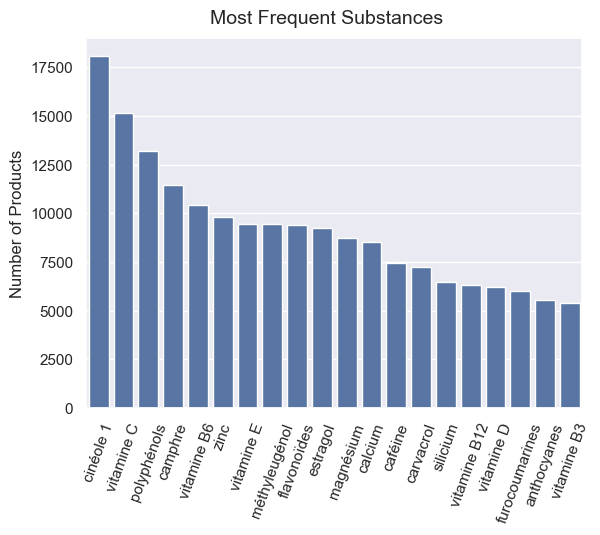

In [348]:
num_ex = 20
keys = substance_freq.head(num_ex).index
vals = substance_freq.head(num_ex).values

plt.suptitle('Most Frequent Substances', size=14, y=0.94);   
sns.barplot(x=keys, y=vals)
plt.xlabel('')
plt.ylabel('Number of Products')
plt.xticks(rotation=70)
plt.show()

## Complement Is BIO ?
* infered from name only

In [318]:
def join_columns(row):
    to_join = [str(row['NomCommercial']), str(row['Marque']), str(row['Gamme'])]
    joined_str = ' - '.join(to_join)
    return joined_str



def verify_bio_label(df):

    # join columns into a single auxiliar str column
    df['Nom_Marque_Gamme'] = df.apply(join_columns, axis=1)

    # Define a regex pattern for 'bio' keywords
    bio_labels = r"\b(bio|biologique)\b"      # Match single labels (\b is word boundary)
    
    # Apply regex to create a column to label 'bio' products
    df['is_bio'] = df['Nom_Marque_Gamme'].str.contains(
                                                bio_labels,  # Use the regex pattern
                                                flags=re.IGNORECASE,  # Case insensitive matching
                                                na=False  # Handle NaN gracefully
                                                )    
    
    df.drop('Nom_Marque_Gamme', axis=1, inplace=True)

    return df

# df_test = df_complements.copy()
# df_test[df_test['is_bio']==True].loc[:,['NomCommercial', 'Marque', 'is_bio']]


df_complements = verify_bio_label(df_complements)


C:\Users\19rod\AppData\Local\Temp\ipykernel_14384\796776011.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['is_bio'] = df['Nom_Marque_Gamme'].str.contains(


In [319]:
df_complements[df_complements['is_bio']==True].loc[:,['NomCommercial','Marque','Gamme','is_bio']].head()

,NomCommercial,Marque,Gamme,is_bio
9,PASSIFLORE,PRODILAB,INOVYA BIO,True
10,Force G Bio Stimulant Spray,Vitavea Santé,Force G,True
11,Chlorella BIO 1.000 mg,Vegavero,NaN,True
12,Natural B12 BIO (Aus Shiitake),Vegavero,NaN,True
35,Aloe Vera BIO Extrakt,Vegavero,NaN,True


#### Proportion of products identified as 'bio'

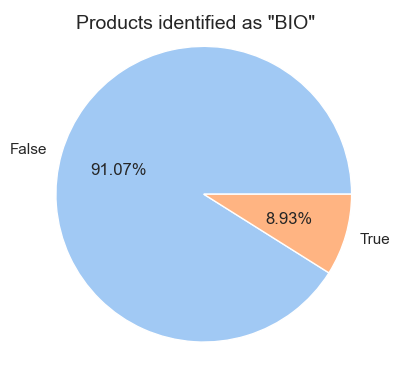

In [338]:
# display(df_complements['is_bio'].value_counts())

#define data
data = df_complements['is_bio'].value_counts(normalize=True).values
labels = df_complements['is_bio'].value_counts(normalize=True).index

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.suptitle('Products identified as "BIO"', size=14, y=0.87);   
# plt.title(
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.show()

## Complement Name has quantity specified ? 

In [185]:
def verify_quantity_in_name(df):

    # Match if 
    quantity_pattern = r"\b\d+([.,]?\d+)?\s?(mg|g|kg|µg|mcg|ml|l|oz|lb)\b"
    
    # Apply regex to create a column to label 'bio' products
    df['has_quantity'] = df['NomCommercial'].str.contains(
                                                quantity_pattern,  # Use the regex pattern
                                                flags=re.IGNORECASE,  # Case insensitive matching
                                                na=False  # Handle NaN gracefully
                                                )
    
    return df

In [186]:
df_complements = verify_quantity_in_name(df_complements)

df_complements[df_complements['has_quantity']==True].loc[:,['NomCommercial','FormeGalenique','DoseJournaliere','ModeEmploi','has_quantity','substances']]

C:\Users\19rod\AppData\Local\Temp\ipykernel_14384\3820341966.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['has_quantity'] = df['NomCommercial'].str.contains(


,NomCommercial,FormeGalenique,DoseJournaliere,ModeEmploi,has_quantity,substances
6,Trikatu 300mg,Gélule,3 gélules,NaN,True,"gingérol,méthyleugénol,alcaloïdes pipéridiniqu..."
11,Chlorella BIO 1.000 mg,Comprimé,3,Prenez 3 comprimés par jour avec suffisamment ...,True,
13,GUARANA 500 mg SINGULARIS Superior,Capsule,4,NaN,True,"anéthol,caféine,estragol"
38,Reishi Bio 300 mg,Gélule,2 Gélule par jour,NaN,True,"vitamine C,bêtaglucanes,ganodériol F,ganoderma..."
91,"GELEE ROYALE 2500 MG, ampoules",Ampoule,1 ampoule,"Le matin de préférence, diluée dans un demi-ve...",True,"miel,acide 10 hydroxydécanoïque,gelée royale"
...,...,...,...,...,...,...
96242,Huile d'Onagre 500mg + Vit E 5mg,Capsule,3 capsules,NaN,True,vitamine E
96252,Orthosiphon 50mg,Gélule,150mg,NaN,True,
96253,E-Lyte 118 mL,Autre forme liquide (à préciser),"Adultes: Prendre 7,5 mL avec 237 mL d'eau par ...","Adultes: Prendre 7,5 mL avec 237 mL d'eau par ...",True,"magnésium,sodium,potassium,magnésium,potassium..."
96263,Canneberge 36mg de PACs LJDV,Gélule,1 gélule par jour,Prendre 1 gélule par jour avec un grand verre ...,True,"hydroquinone,oligo-proanthocyanidines"


In [187]:
df_complements['has_quantity'].value_counts(normalize=True)

has_quantity
False    0.963839
True     0.036161
Name: proportion, dtype: float64

# Save dataframe to CSV

### Save dataframe

In [189]:
save = True

path = './data/'
filename = 'complements-et-substances.csv'

if save:
    df_complements.to_csv(path+filename, index=False)

### Load dataframe

In [190]:
load = True

path = './data/'
filename = 'complements-et-substances.csv'

if load:
    df_complements = pd.read_csv(path+filename, sep=',')

df_complements.head()

,NomCommercial,Marque,FormeGalenique,ResponsableEtiquetage,DoseJournaliere,ModeEmploi,MisesEnGarde,Gamme,Aromes,population_a_risques,plantes,familles_plantes,parties_plantes,autres_ingredients,objectif_effet,substances,is_bio,has_quantity
0,CENTELLA extrait 4/1,SYNERVITAL,Gélule,IMPORT EXPORT DISTRI BUSINESS SYSTEM,4 gélules,avec un grand verre d'eau,NaN,NaN,NaN,NaN,Centella asiatica (L.) Urb.,Apiaceae,Feuille,maltodextrine,NaN,NaN,False,False
1,gingko biloba,labkaps,Gélule,LABKAPS,2 à 3 gélules/jour,NaN,NaN,NaN,NaN,"Allaitement,Enfants (moins de 12 ans),Grossess...",Ginkgo biloba L.,Ginkgoaceae,Feuille,Hydroxypropyl Méthyl Cellulose,"Concentration,Humeur,Mémoire","acide ginkgolique,glycosides de flavonols,lact...",False,False
2,Grand ortie,NaN,Compte-gouttes,COFFINET MICHAEL,18 gouttes,NaN,NaN,NaN,NaN,"Allaitement,Enfants en bas âge (1 à 3 ans),Gro...",Urtica dioica L.,Urticaceae,Feuille,"E422,Eau potable","Détoxifiant / Draineur,Humeur,Système urinaire",silicium,False,False
3,Psyllium noir semence,L'Herbier de Gascogne / Le Comptoir de l'Apoth...,Sachet,L HERBIER DE GASCOGNE,1 à 3 cuillères à café par jour,Prendre une cuillère à café (env. 5 grammes) a...,Ne pas dépasser la dose journalière recommandé...,NaN,NaN,Autre (à préciser),Plantago afra L.,Plantaginaceae,Graine,NaN,Transit,NaN,False,False
4,Chrysanthellum,NaN,Gélule,ORONALYS SARL,3 gélules par jour,NaN,Ce complément alimentaire doit être utilisé da...,ORO-DIGEST,NaN,"Allaitement,Enfants (moins de 12 ans),Grossesse",Chrysanthellum americanum (L.) Vatke,Compositae,Parties aériennes,"E414,Hydroxypropyl Méthyl Cellulose",NaN,NaN,False,False


# Save dataframe to json

In [191]:
save = True

## lower case column names
new_col_names = [name.lower() for name in df_complements.columns]

df_json = df_complements.copy()
df_json.columns = new_col_names

path = './data/'
filename = 'complements-et-substances.json'

if save:
    df_json.to_json(path+filename, orient = 'split', compression = 'infer', index = 'false')

In [259]:
load = True

path = './data/'
filename = 'complements-et-substances.json'

if load:
    df_fromjson = pd.read_json(path+filename, orient ='split', compression = 'infer')

df_fromjson.head()

,nomcommercial,marque,formegalenique,responsableetiquetage,dosejournaliere,modeemploi,misesengarde,gamme,aromes,population_a_risques,plantes,familles_plantes,parties_plantes,autres_ingredients,objectif_effet,substances,is_bio,has_quantity
0,CENTELLA extrait 4/1,SYNERVITAL,Gélule,IMPORT EXPORT DISTRI BUSINESS SYSTEM,4 gélules,avec un grand verre d'eau,None,None,None,None,Centella asiatica (L.) Urb.,Apiaceae,Feuille,maltodextrine,None,None,False,False
1,gingko biloba,labkaps,Gélule,LABKAPS,2 à 3 gélules/jour,None,None,None,None,"Allaitement,Enfants (moins de 12 ans),Grossess...",Ginkgo biloba L.,Ginkgoaceae,Feuille,Hydroxypropyl Méthyl Cellulose,"Concentration,Humeur,Mémoire","acide ginkgolique,glycosides de flavonols,lact...",False,False
2,Grand ortie,None,Compte-gouttes,COFFINET MICHAEL,18 gouttes,None,None,None,None,"Allaitement,Enfants en bas âge (1 à 3 ans),Gro...",Urtica dioica L.,Urticaceae,Feuille,"E422,Eau potable","Détoxifiant / Draineur,Humeur,Système urinaire",silicium,False,False
3,Psyllium noir semence,L'Herbier de Gascogne / Le Comptoir de l'Apoth...,Sachet,L HERBIER DE GASCOGNE,1 à 3 cuillères à café par jour,Prendre une cuillère à café (env. 5 grammes) a...,Ne pas dépasser la dose journalière recommandé...,None,None,Autre (à préciser),Plantago afra L.,Plantaginaceae,Graine,None,Transit,None,False,False
4,Chrysanthellum,None,Gélule,ORONALYS SARL,3 gélules par jour,None,Ce complément alimentaire doit être utilisé da...,ORO-DIGEST,None,"Allaitement,Enfants (moins de 12 ans),Grossesse",Chrysanthellum americanum (L.) Vatke,Compositae,Parties aériennes,"E414,Hydroxypropyl Méthyl Cellulose",None,None,False,False


In [260]:
df_fromjson.shape

(95518, 18)

In [261]:
df_complements.shape

(95518, 17)